# Uploading the data files

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/octChunk0.csv")
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/octChunk1.csv")
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/octChunk2.csv")
df4 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/octChunk3.csv")
df5 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/octChunk4.csv")
df6 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk0.csv")
df7 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk1.csv")
df8 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk2.csv")
df9 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk3.csv")
df10 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk4.csv")
df11 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk5.csv")
df12 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/novChunk6.csv")
df13 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/test_chunk002-1.csv")
df14 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/halfchunk0.csv")

Combining the split files

In [0]:
combined_df = df1.union(df2).union(df3).union(df4).union(df5)
combined_df.columns

Out[171]: ['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

In [0]:
combined2_df = df1.union(df6).union(df7).union(df8).union(df9).union(df10).union(df11).union(df12)
combined2_df.columns

Out[3]: ['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

Viewing the dataset

In [0]:
combined_df.head()

Out[58]: Row(event_time='2019-10-01 00:00:00 UTC', event_type='view', product_id='44600062', category_id='2103807459595387724', category_code=None, brand='shiseido', price='35.79', user_id='541312140', user_session='72d76fde-8bb3-4e00-8c23-a032dfed738c')

In [0]:
combined_df.show()

+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:...|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:...|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:...|      view|   1004237|205301355563188265

In [0]:
#counting the number of rows in the dataframe
combined_df.count()

In [0]:
combined_df.select('user_id').distinct().count()

Out[8]: 3022290

REMOVED NULL VALUESS

In [0]:
# Select relevant columns and remove rows with null values
my_cols = combined_df.select(['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session'])
my_final_data = my_cols.na.drop()

In [0]:
my_final_data.show()

+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:...|      view|   1004237|2053013555631882655|electronics.smart...|   apple|1081.98|535871217|c6bd7419-2748-4c5...|
|2019-10-01 00:00:...|      view|   1480613|2053013561092866779|   computers.desktop|  pulser| 908.62|512742880|0d0d91c2-c9c2-4e8...|
|2019-10-01 00:00:...|      view|  28719074|205301356548010900

In [0]:
from pyspark.sql.functions import avg, sum, max, min, count, stddev

# Analysing The Data for OCT

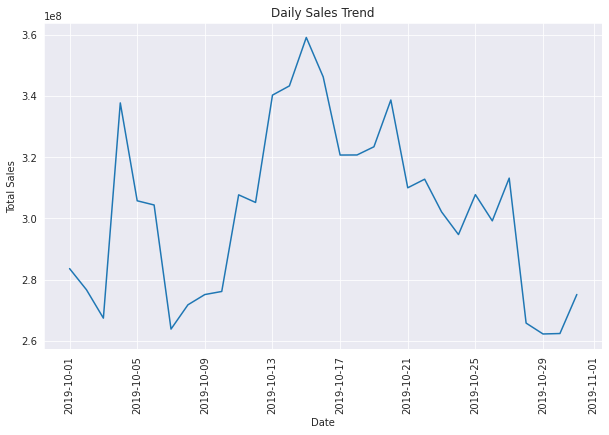

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, sum
from pyspark.sql.types import DateType

# Convert the event_time column to a DateType column
df = my_final_data.withColumn('date', to_date('event_time'))

# Group the data by date and calculate the total sales for each day
daily_sales = df.groupBy('date').agg(sum('price').alias('total_sales'))

# Convert the daily_sales DataFrame to a Pandas DataFrame
daily_sales_pd = daily_sales.toPandas()

# Set Seaborn style
sns.set_style("darkgrid")

# Plot the daily sales trend using a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_sales', data=daily_sales_pd)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation='vertical')
plt.show()


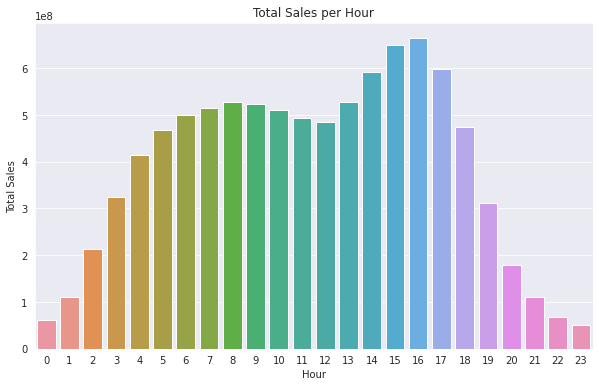

In [0]:
#TOTAL SALES PER HOUR
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour

# Extract the hour from the 'event_time' column
df = my_final_data.withColumn("hour", hour("event_time"))

# Group by hour and calculate the total sales for each hour
sales_per_hour = df.groupBy("hour").agg({"price": "sum"}).sort("hour")

# Convert the DataFrame to a Pandas DataFrame for plotting
sales_per_hour_pd = sales_per_hour.toPandas()

# Use Seaborn to plot the sales per hour
plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="sum(price)", data=sales_per_hour_pd)
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.title("Total Sales per Hour")
plt.show()


In [0]:
product_id = 1003461 
combined_df[combined_df['product_id'] == product_id][['category_code','brand']].head(1)

Out[13]: [Row(category_code='electronics.smartphone', brand='xiaomi')]

In [0]:
#Category-based Analysis:
#You can analyze trends based on product categories, such as the total sales, average price, or top-selling brands for each category.
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, avg
# Group by 'category_code' and calculate total sales, average price, and top-selling brands
category_sales = my_final_data.groupBy("category_code").agg(
    sum("price").alias("total_sales"),
    avg("price").alias("avg_price"),
    
)
# Show the category-based analysis
category_sales.show()


+--------------------+--------------------+------------------+
|       category_code|         total_sales|         avg_price|
+--------------------+--------------------+------------------+
|apparel.shoes.sli...|  206036.27999999994| 43.15799748638457|
|    computers.ebooks|   4703001.270000008|157.66011632584673|
|computers.periphe...|   2518924.979999995| 54.71998305563389|
|electronics.video...|   8740076.899999999| 665.3023445231025|
|appliances.kitche...|   383994.2299999999|32.572247858172865|
|     sport.snowboard|   745221.1299999998|232.22846057961974|
|electronics.camer...|1.5343178379999982E7| 387.0142106192454|
|       apparel.shirt|   661925.0300000007|49.118806025526915|
|electronics.audio...|1.0697460342000042E8| 97.87676258426758|
|appliances.kitche...|3.4625071339999974E7|426.90081545593495|
|appliances.kitche...|  4923196.5000000065|106.19492018981894|
|  electronics.tablet|1.0792407170999898E8|341.30289713862527|
|appliances.kitche...|2.4971081040000003E7| 235.6607183

In [0]:

# Count the distinct number of user_id values
unique_customers = my_final_data.select("user_id").distinct().count()

# Print the result
print("Total number of unique customers: ", unique_customers)


Total number of unique customers:  2323036


In [0]:
#Which category customers interact the most? 
#What brand the view to most?

from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc


# Group by category_code and count the interactions
category_interactions = my_final_data.groupBy("category_code").agg(count("*").alias("interactions"))

# Sort by interactions in descending order
category_interactions = category_interactions.sort(desc("interactions"))

# Get the category with the most interactions
most_interacted_category = category_interactions.select("category_code").first()[0]

# Group by brand and count the views
brand_views = df.filter("event_type = 'view'").groupBy("brand").agg(count("*").alias("views"))

# Sort by views in descending order
brand_views = brand_views.sort(desc("views"))

# Get the brand with the most views
most_viewed_brand = brand_views.select("brand").first()[0]

# Print the results
print("Category with the most interactions: ", most_interacted_category)
print("Brand with the most views: ", most_viewed_brand)


Category with the most interactions:  electronics.smartphone
Brand with the most views:  samsung


In [0]:
#What brands the customers buy?

# Filter the data to only include purchase events
purchases = my_final_data.filter("event_type = 'purchase'")

# Group by brand and count the purchases
brand_purchases = purchases.groupBy("brand").agg(count("*").alias("purchases"))

# Sort by purchases in descending order
brand_purchases = brand_purchases.sort(desc("purchases"))

# Show the top 10 brands with the most purchases
brand_purchases.show(10)

+--------+---------+
|   brand|purchases|
+--------+---------+
| samsung|   171706|
|   apple|   142577|
|  xiaomi|    46595|
|  huawei|    23294|
|    oppo|    10891|
|      lg|     7831|
|    acer|     6882|
|elenberg|     5435|
| indesit|     5023|
|   artel|     4717|
+--------+---------+
only showing top 10 rows



# Analysing the data for NOV

In [0]:
# Select relevant columns and remove rows with null values
my_cols = combined2_df.select(['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session'])
my_final_data_nov = my_cols.na.drop()

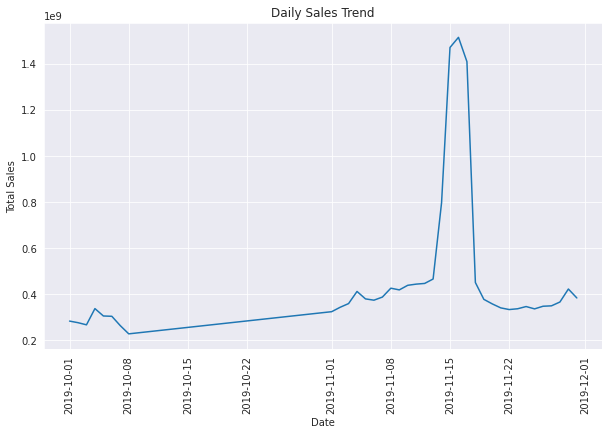

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, sum
from pyspark.sql.types import DateType

# Convert the event_time column to a DateType column
df = my_final_data_nov.withColumn('date', to_date('event_time'))

# Group the data by date and calculate the total sales for each day
daily_sales = df.groupBy('date').agg(sum('price').alias('total_sales'))

# Convert the daily_sales DataFrame to a Pandas DataFrame
daily_sales_pd = daily_sales.toPandas()

# Set Seaborn style
sns.set_style("darkgrid")

# Plot the daily sales trend using a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_sales', data=daily_sales_pd)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation='vertical')
plt.show()

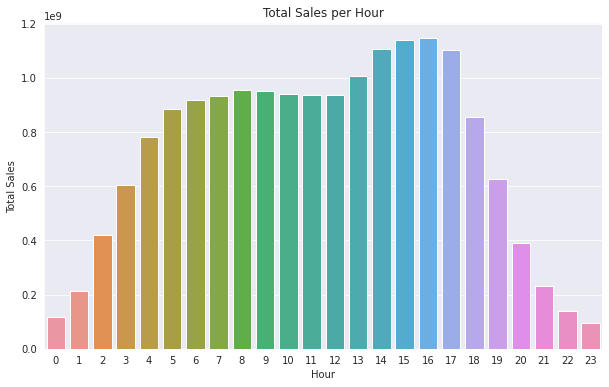

In [0]:
#TOTAL SALES PER HOUR
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour

# Extract the hour from the 'event_time' column
df = my_final_data_nov.withColumn("hour", hour("event_time"))

# Group by hour and calculate the total sales for each hour
sales_per_hour = df.groupBy("hour").agg({"price": "sum"}).sort("hour")

# Convert the DataFrame to a Pandas DataFrame for plotting
sales_per_hour_pd = sales_per_hour.toPandas()

# Use Seaborn to plot the sales per hour
plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="sum(price)", data=sales_per_hour_pd)
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.title("Total Sales per Hour")
plt.show()

In [0]:
#Category-based Analysis:
#You can analyze trends based on product categories, such as the total sales, average price, or top-selling brands for each category.
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, avg, max
# Group by 'category_code' and calculate total sales, average price, and top-selling brands
category_sales = my_final_data_nov.groupBy("category_code").agg(
    sum("price").alias("total_sales"),
    avg("price").alias("avg_price"),
    max("brand").alias("top_brand")
)
# Show the category-based analysis
category_sales.show()

+--------------------+--------------------+------------------+------------+
|       category_code|         total_sales|         avg_price|   top_brand|
+--------------------+--------------------+------------------+------------+
|     accessories.bag|1.9711036839999977E7| 65.44864275088979|        zubr|
|accessories.umbrella|  123438.09999999999|  20.5524642024642|      xiaomi|
|  accessories.wallet|    4093537.07000001| 53.04570519631994|       titan|
|        apparel.belt|            67489.19|33.744595000000004|tonybellucci|
|     apparel.costume| 1.356918156000002E7|168.49428252123403|         tyr|
|       apparel.dress|   5515902.959999999| 70.05388706850566|     weekend|
|       apparel.glove|  209373.71000000005| 61.20248757673196|       venum|
|      apparel.jacket|  1808.2799999999993| 50.22999999999998|         sly|
|       apparel.jeans|   574715.5599999999| 43.96875219952566|     weekend|
|      apparel.jumper|  1141066.3900000027|36.201344860406174|     weekend|
|       appa

In [0]:
from pyspark.sql.functions import count, desc
#What brands the customers buy?

# Filter the data to only include purchase events
purchases = my_final_data_nov.filter("event_type = 'purchase'")

# Group by brand and count the purchases
brand_purchases = purchases.groupBy("brand").agg(count("*").alias("purchases"))

# Sort by purchases in descending order
brand_purchases = brand_purchases.sort(desc("purchases"))

# Show the top 10 brands with the most purchases
brand_purchases.show(10)

+-------+---------+
|  brand|purchases|
+-------+---------+
|samsung|   238505|
|  apple|   199415|
| xiaomi|    68680|
| huawei|    29257|
|   oppo|    17335|
|     lg|    13672|
|  artel|     8450|
|   acer|     7939|
| lenovo|     7859|
|  bosch|     6650|
+-------+---------+
only showing top 10 rows



# Price Optimization

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Load the dataset
df = spark.read.csv("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/test_chunk002-1.csv", header=True, inferSchema=True)

# Prepare the data
assembler = VectorAssembler(inputCols=["price"], outputCol="features")
df = assembler.transform(df)

# Split the data into training and test sets
(trainingData, testData) = df.randomSplit([0.7, 0.3])

# Train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="purchased")
lrModel = lr.fit(trainingData)

# Make predictions on the test set
predictions = lrModel.transform(testData)

# Evaluate the model performance
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="purchased", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Optimize prices based on the model
optimal_prices = lrModel.summary.predictions.groupBy().agg({'price': 'mean'}).collect()[0][0]
print("Optimal prices: %g" % optimal_prices)


Root Mean Squared Error (RMSE) on test data = 0.242251
Optimal prices: 262.184


The Brand having most optimal pricing

In [0]:
temp_table_name = "ecommerce_behavior_data"
 
df.createOrReplaceTempView(temp_table_name)

To find the brand with the most optimal pricing

In [0]:
%sql
SELECT brand, AVG(price) AS avg_price
FROM ecommerce_behavior_data
GROUP BY brand
ORDER BY avg_price ASC
LIMIT 1;

brand,avg_price
dox,6.44


To find the optimal prices for the brands Samsung, Dox, Canon, Toro, and Apple.

In [0]:
%sql
SELECT brand, AVG(price) AS avg_price
FROM ecommerce_behavior_data
WHERE brand IN ('samsung', 'dox', 'canon', 'toro', 'apple')
GROUP BY brand
ORDER BY avg_price DESC;

brand,avg_price
apple,796.6758558558563
samsung,318.07549180327874
canon,146.7
toro,12.796666666666667
dox,6.44


In [0]:
%sql
SELECT user_id, COUNT(DISTINCT event_type) AS num_purchases, AVG(price) AS avg_purchase_price
FROM ecommerce_behavior_data
WHERE event_type = 'purchase'
GROUP BY user_id
HAVING num_purchases >= 5 AND avg_purchase_price < 500;


user_id,num_purchases,avg_purchase_price


### Prediction based on event type equal to "view" the Purchased column is "No = 0" when event type is "purchased" and "cart" then Purchased column is "Yes = 1" (to predict whether a customer will make a purchase or not based on their behavior )

In [0]:
file_location = "dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/test_chunk002-1.csv"
file_type = "csv"

infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_reg = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 
display(df_reg)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchased
2019-10-30T04:05:08.000+0000,view,17200528,2.05E18,furniture.living_room.sofa,null,847.59,551410056,f753ef41-11df-4e40-bbce-2cfbb2a1f3e9,0
2019-10-30T04:05:08.000+0000,view,4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,563886181,9d21d405-a5d8-4e99-9823-27bf1a303d68,0
2019-10-30T04:05:08.000+0000,view,1004659,2.05E18,electronics.smartphone,samsung,718.0,529016735,e5123e7e-2645-4ceb-aced-d3a61a2c615f,0
2019-10-30T04:05:08.000+0000,view,1004739,2.05E18,electronics.smartphone,xiaomi,196.91,515056284,a94c33b1-233d-4942-ab9f-0c59198a8b46,0
2019-10-30T04:05:09.000+0000,view,34200160,2.06E18,null,rivacase,14.13,522624206,effdabcf-55d1-4310-a760-2de17fd53b11,0
2019-10-30T04:05:09.000+0000,purchase,1004870,2.05E18,electronics.smartphone,samsung,278.38,520707782,1c821072-9874-4cd6-98f8-9da12da71c83,1
2019-10-30T04:05:09.000+0000,view,3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,538375766,ec2aec24-ad77-496d-b508-176d80216865,0
2019-10-30T04:05:09.000+0000,view,1004856,2.05E18,electronics.smartphone,samsung,130.99,563375280,5dd28b85-d4ef-4e9e-aa31-287778aba5c2,0
2019-10-30T04:05:09.000+0000,view,10700827,2.05E18,null,ubisoft,25.74,513165557,42c90874-8274-4ac9-ad78-448a0bf3a1ce,0
2019-10-30T04:05:09.000+0000,view,28102492,2.05E18,null,royal,45.17,540614086,7dceb61b-705f-46c5-b9dd-c2801d6f4152,0


In [0]:
# Select relevant columns and remove rows with null values
df_reg_my_cols = df_reg.select(['product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
  'purchased'])
df_reg_final_data = df_reg_my_cols.na.drop()

In [0]:
from pyspark.ml.linalg import Vectors


In [0]:
assembler = VectorAssembler(
    inputCols=['product_id',
 'category_id',
 'brand',
 'price',
  'purchased'],
    outputCol="features")

In [0]:
display(df_reg_final_data)

product_id,category_id,category_code,brand,price,purchased
4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,0
1004659,2.05E18,electronics.smartphone,samsung,718.0,0
1004739,2.05E18,electronics.smartphone,xiaomi,196.91,0
1004870,2.05E18,electronics.smartphone,samsung,278.38,1
3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,0
1004856,2.05E18,electronics.smartphone,samsung,130.99,0
1004813,2.05E18,electronics.smartphone,honor,231.64,0
1004627,2.05E18,electronics.smartphone,inoi,35.75,0
3700898,2.05E18,appliances.environment.vacuum,samsung,123.3,0
1004258,2.05E18,electronics.smartphone,apple,718.14,0


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
import pyspark.sql.functions as F
 
# categorical columns
categorical_columns = df_reg_final_data.columns[0:9]
stage_string = [StringIndexer(inputCol= c, outputCol= c+"_string_encoded") for c in categorical_columns]
stage_one_hot = [OneHotEncoder(inputCol= c+"_string_encoded", outputCol= c+ "_one_hot") for c in categorical_columns]
 
ppl = Pipeline(stages=stage_string + stage_one_hot)
df = ppl.fit(df_reg_final_data).transform(df_reg_final_data)
 
df.select("product_id", 'product_id_string_encoded').distinct().sort(F.asc("product_id_string_encoded")).show()
df.select("price", 'price_string_encoded').distinct().show()
df.select("brand", 'brand_string_encoded').distinct().show()
df.select("purchased", 'purchased_string_encoded').distinct().show()
df.select("category_id",'category_id_string_encoded' ).distinct().show()

+----------+-------------------------+
|product_id|product_id_string_encoded|
+----------+-------------------------+
|   1004856|                      0.0|
|   1005115|                      1.0|
|   1005105|                      2.0|
|   1002544|                      3.0|
|   1004767|                      4.0|
|   1005239|                      5.0|
|   1004833|                      6.0|
|   1004870|                      7.0|
|   4804056|                      8.0|
|   1004249|                      9.0|
|   1004708|                     10.0|
|   1004741|                     11.0|
|   1005014|                     12.0|
|   1005160|                     13.0|
|   1005217|                     14.0|
|   4804572|                     15.0|
|   1003306|                     16.0|
|   1004258|                     17.0|
|   1004858|                     18.0|
|   1005008|                     19.0|
+----------+-------------------------+
only showing top 20 rows

+-------+--------------------+
|  pric

In [0]:
ppl = Pipeline(stages=stage_string + stage_one_hot)
df = ppl.fit(df_reg_final_data).transform(df_reg_final_data)
df.show()

+----------+-----------+--------------------+--------+-------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+-------------------+---------------------+-----------------+-----------------+-----------------+
|product_id|category_id|       category_code|   brand|  price|purchased|product_id_string_encoded|category_id_string_encoded|category_code_string_encoded|brand_string_encoded|price_string_encoded|purchased_string_encoded|product_id_one_hot|category_id_one_hot|category_code_one_hot|    brand_one_hot|    price_one_hot|purchased_one_hot|
+----------+-----------+--------------------+--------+-------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+-------------------+---------------------+-----------------+-----------------+--------

In [0]:
# Build VectorAssembler stage
 
assembler = VectorAssembler(
  inputCols=[
             'category_id_one_hot',
             'brand_one_hot',
             'price_one_hot',
             ],
    outputCol="features")

df_reg_final_data = assembler.transform(df)
display(df_reg_final_data)
 

df_reg_final_data = df_reg_final_data.withColumn('label', F.col('purchased'))
df_reg_final_data.select("features", "label").show()
display(df_reg_final_data)

product_id,category_id,category_code,brand,price,purchased,product_id_string_encoded,category_id_string_encoded,category_code_string_encoded,brand_string_encoded,price_string_encoded,purchased_string_encoded,product_id_one_hot,category_id_one_hot,category_code_one_hot,brand_one_hot,price_one_hot,purchased_one_hot,features
4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,0,37.0,0.0,1.0,2.0,38.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(37), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(38), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 10, 179), values -> List(1.0, 1.0, 1.0))"
1004659,2.05E18,electronics.smartphone,samsung,718.0,0,24.0,0.0,0.0,0.0,51.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(24), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(51), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 8, 192), values -> List(1.0, 1.0, 1.0))"
1004739,2.05E18,electronics.smartphone,xiaomi,196.91,0,50.0,0.0,0.0,2.0,79.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(50), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(79), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 10, 220), values -> List(1.0, 1.0, 1.0))"
1004870,2.05E18,electronics.smartphone,samsung,278.38,1,7.0,0.0,0.0,0.0,8.0,1.0,"Map(vectorType -> sparse, length -> 389, indices -> List(7), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(8), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 481, indices -> List(0, 8, 149), values -> List(1.0, 1.0, 1.0))"
3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,0,319.0,0.0,6.0,126.0,141.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(319), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(6), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(126), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(141), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 134, 282), values -> List(1.0, 1.0, 1.0))"
1004856,2.05E18,electronics.smartphone,samsung,130.99,0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(481,[0,10,179],[...|    0|
|(481,[0,8,192],[1...|    0|
|(481,[0,10,220],[...|    0|
|(481,[0,8,149],[1...|    1|
|(481,[0,134,282],...|    0|
|(481,[0,8,141],[1...|    0|
|(481,[0,23,157],[...|    0|
|(481,[0,100,378],...|    0|
|(481,[0,8,294],[1...|    0|
|(481,[0,9,166],[1...|    0|
|(481,[0,72,306],[...|    0|
|(481,[0,9,184],[1...|    0|
|(481,[0,9,268],[1...|    0|
|(481,[0,8,141],[1...|    0|
|(481,[0,109,470],...|    0|
|(481,[0,8,207],[1...|    0|
|(481,[0,9,158],[1...|    0|
|(481,[0,11,366],[...|    0|
|(481,[0,9,200],[1...|    0|
|(481,[0,20,163],[...|    1|
+--------------------+-----+
only showing top 20 rows



product_id,category_id,category_code,brand,price,purchased,product_id_string_encoded,category_id_string_encoded,category_code_string_encoded,brand_string_encoded,price_string_encoded,purchased_string_encoded,product_id_one_hot,category_id_one_hot,category_code_one_hot,brand_one_hot,price_one_hot,purchased_one_hot,features,label
4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,0,37.0,0.0,1.0,2.0,38.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(37), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(38), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 10, 179), values -> List(1.0, 1.0, 1.0))",0
1004659,2.05E18,electronics.smartphone,samsung,718.0,0,24.0,0.0,0.0,0.0,51.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(24), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(51), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 8, 192), values -> List(1.0, 1.0, 1.0))",0
1004739,2.05E18,electronics.smartphone,xiaomi,196.91,0,50.0,0.0,0.0,2.0,79.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(50), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(79), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 10, 220), values -> List(1.0, 1.0, 1.0))",0
1004870,2.05E18,electronics.smartphone,samsung,278.38,1,7.0,0.0,0.0,0.0,8.0,1.0,"Map(vectorType -> sparse, length -> 389, indices -> List(7), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(8), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 481, indices -> List(0, 8, 149), values -> List(1.0, 1.0, 1.0))",1
3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,0,319.0,0.0,6.0,126.0,141.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(319), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 64, indices -> List(6), values -> List(1.0))","Map(vectorType -> sparse, length -> 133, indices -> List(126), values -> List(1.0))","Map(vectorType -> sparse, length -> 340, indices -> List(141), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 481, indices -> List(0, 134, 282), values -> List(1.0, 1.0, 1.0))",0
1004856,2.05E18,electronics.smartphone,samsung,130.99,0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 389, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0), v

In [0]:
df_reg_final_data.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field product_id_one_hot. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,product_id,category_id,category_code,brand,price,purchased,product_id_string_encoded,category_id_string_encoded,category_code_string_encoded,brand_string_encoded,price_string_encoded,purchased_string_encoded,product_id_one_hot,category_id_one_hot,category_code_one_hot,brand_one_hot,price_one_hot,purchased_one_hot,features,label
0,4804295,2.050000e+18,electronics.audio.headphone,xiaomi,22.84,0,37.0,0.0,1.0,2.0,38.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,1004659,2.050000e+18,electronics.smartphone,samsung,718.00,0,24.0,0.0,0.0,0.0,51.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0
2,1004739,2.050000e+18,electronics.smartphone,xiaomi,196.91,0,50.0,0.0,0.0,2.0,79.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,1004870,2.050000e+18,electronics.smartphone,samsung,278.38,1,7.0,0.0,0.0,0.0,8.0,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",(0.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",1
4,3701016,2.050000e+18,appliances.environment.vacuum,tefal,108.09,0,319.0,0.0,6.0,126.0,141.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,1005205,2.050000e+18,electronics.smartphone,oppo,231.64,0,33.0,0.0,0.0,4.0,16.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
615,6000167,2.050000e+18,auto.accessories.alarm,centurion,82.11,0,361.0,0.0,15.0,66.0,319.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
616,17800248,2.050000e+18,computers.desktop,zeta,118.01,0,241.0,0.0,16.0,30.0,150.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
617,28715779,2.050000e+18,apparel.shoes,nexpero,51.22,0,288.0,0.0,3.0,17.0,9.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [0]:
# Split data into training and test datasets
training, test = df_reg_final_data.randomSplit([0.7, 0.3], seed=123)

In [0]:
#import the logistic regression 
from pyspark.ml.regression import GeneralizedLinearRegression

#Apply the logistic regression model
logr = GeneralizedLinearRegression(family="binomial", link="logit", regParam=0.0)
logr_Model = logr.fit(training)

In [0]:
# Prediction on training data
pred_training_cv = logr_Model.transform(training)
pred_training_cv.show(5, truncate=False)

+----------+-----------+----------------------+-----+------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+-------------------+---------------------+---------------+-----------------+-----------------+------------------------------+-----+----------+
|product_id|category_id|category_code         |brand|price |purchased|product_id_string_encoded|category_id_string_encoded|category_code_string_encoded|brand_string_encoded|price_string_encoded|purchased_string_encoded|product_id_one_hot|category_id_one_hot|category_code_one_hot|brand_one_hot  |price_one_hot    |purchased_one_hot|features                      |label|prediction|
+----------+-----------+----------------------+-----+------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+

In [0]:
# Prediction on test data
pred_test_cv = logr_Model.transform(test)
pred_test_cv.show(5, truncate=False)

+----------+-----------+----------------------+-----+------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+-------------------+---------------------+---------------+-----------------+-----------------+-----------------------------+-----+----------+
|product_id|category_id|category_code         |brand|price |purchased|product_id_string_encoded|category_id_string_encoded|category_code_string_encoded|brand_string_encoded|price_string_encoded|purchased_string_encoded|product_id_one_hot|category_id_one_hot|category_code_one_hot|brand_one_hot  |price_one_hot    |purchased_one_hot|features                     |label|prediction|
+----------+-----------+----------------------+-----+------+---------+-------------------------+--------------------------+----------------------------+--------------------+--------------------+------------------------+------------------+--

In [0]:
pred_test_cv.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field product_id_one_hot. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,product_id,category_id,category_code,brand,price,purchased,product_id_string_encoded,category_id_string_encoded,category_code_string_encoded,brand_string_encoded,...,purchased_string_encoded,product_id_one_hot,category_id_one_hot,category_code_one_hot,brand_one_hot,price_one_hot,purchased_one_hot,features,label,prediction
0,1002524,2.050000e+18,electronics.smartphone,apple,531.29,0,21.0,0.0,0.0,1.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
1,1002544,2.050000e+18,electronics.smartphone,apple,459.21,0,3.0,0.0,0.0,1.0,...,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
2,1002544,2.050000e+18,electronics.smartphone,apple,459.21,0,3.0,0.0,0.0,1.0,...,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
3,1002544,2.050000e+18,electronics.smartphone,apple,459.21,1,3.0,0.0,0.0,1.0,...,1.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",(0.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1.000000e-16
4,1002628,2.050000e+18,electronics.smartphone,apple,411.83,0,111.0,0.0,0.0,1.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,28717145,2.050000e+18,apparel.shoes.keds,fassen,51.22,0,291.0,0.0,24.0,80.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
185,28720434,2.050000e+18,apparel.shoes,baden,68.21,0,299.0,0.0,3.0,20.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
186,34900059,2.070000e+18,appliances.kitchen.grill,demiray,106.03,0,90.0,4.0,14.0,36.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(1.0),"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.000000e-16
187,48200446,2.150000e+18,apparel.dress,conceptclub,47.62,0,340.0,6.0,31.0,69.0,...,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0,

In [0]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_true = pred_test_cv.select("label")
y_true = y_true.toPandas()
 
y_pred = pred_test_cv.select("prediction").withColumn('pred_label', F.when(F.col('prediction') >3.847404e-05, 1).otherwise(0))
y_pred = y_pred.select('pred_label').toPandas()
 
cnf_matrix = confusion_matrix(y_true, y_pred)
print(cnf_matrix)
print("Prediction Accuracy is ", (cnf_matrix[0,0]+cnf_matrix[1,1])/sum(sum(cnf_matrix)) )

[[162  11]
 [ 14   2]]
Prediction Accuracy is  0.8677248677248677


Out[42]: <AxesSubplot:>

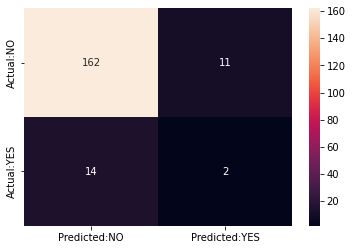

In [0]:
import seaborn as sns
xlabels = ["Predicted:NO", "Predicted:YES"]
ylabels = ["Actual:NO", "Actual:YES"]
sns.heatmap(data = cnf_matrix,
            xticklabels = xlabels,
            yticklabels = ylabels,
            annot=True,fmt='g')

# Price Optimization using Linear Regression.

In [0]:
#import libraries
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [0]:
# use lecture 5 exercise
# Load the dataset
df = spark.read.csv("dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/test_chunk002-1.csv", header=True, inferSchema=True)

# Prepare the data
assembler = VectorAssembler(inputCols=["price"], outputCol="features")
df = assembler.transform(df)
df.show()

+-------------------+----------+----------+-----------+--------------------+--------+-------+---------+--------------------+---------+---------+
|         event_time|event_type|product_id|category_id|       category_code|   brand|  price|  user_id|        user_session|purchased| features|
+-------------------+----------+----------+-----------+--------------------+--------+-------+---------+--------------------+---------+---------+
|2019-10-30 04:05:08|      view|  17200528|    2.05E18|furniture.living_...|    null| 847.59|551410056|f753ef41-11df-4e4...|        0| [847.59]|
|2019-10-30 04:05:08|      view|   4804295|    2.05E18|electronics.audio...|  xiaomi|  22.84|563886181|9d21d405-a5d8-4e9...|        0|  [22.84]|
|2019-10-30 04:05:08|      view|   1004659|    2.05E18|electronics.smart...| samsung|  718.0|529016735|e5123e7e-2645-4ce...|        0|  [718.0]|
|2019-10-30 04:05:08|      view|   1004739|    2.05E18|electronics.smart...|  xiaomi| 196.91|515056284|a94c33b1-233d-494...|      

In [0]:
# Split the data into training and test sets
(trainingData, testData) = df.randomSplit([0.7, 0.3])

# Train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="purchased")
lrModel = lr.fit(trainingData)


In [0]:
def modelsummary(model, param_names):
    import numpy as np
    print ("Note: the last rows are the information for Intercept")
    print ("##","-------------------------------------------------")
    print ("##","  Estimate   |   Std.Error | t Values  |  P-value")
    coef = np.append(list(model.coefficients), model.intercept)
    Summary=model.summary
    param_names.append('intercept')
 
    for i in range(len(Summary.pValues)):
        print ("##",'{:10.6f}'.format(coef[i]),\
        '{:14.6f}'.format(Summary.coefficientStandardErrors[i]),\
        '{:12.3f}'.format(Summary.tValues[i]),\
        '{:12.6f}'.format(Summary.pValues[i]), \
        param_names[i])
 
    print ("##",'---')
    print ("##","Mean squared error: % .6f" \
           % Summary.meanSquaredError, ", RMSE: % .6f" \
           % Summary.rootMeanSquaredError )
    print ("##","Multiple R-squared: %f" % Summary.r2, "," )
    print ("##","Multiple Adjusted R-squared: %f" % Summary.r2adj, ", \
            Total iterations: %i"% Summary.totalIterations)

In [0]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))
param_names = ["category_id", "price", 
               "purchased"]
modelsummary(lrModel, param_names)

Coefficients: [5.068106925309189e-05] Intercept: 0.033736360651760534
Note: the last rows are the information for Intercept
## -------------------------------------------------
##   Estimate   |   Std.Error | t Values  |  P-value
##   0.000051       0.000023        2.165     0.030718 category_id
##   0.033736       0.010162        3.320     0.000947 price
## ---
## Mean squared error:  0.044936 , RMSE:  0.211981
## Multiple R-squared: 0.006522 ,
## Multiple Adjusted R-squared: 0.005130 ,             Total iterations: 0


In [0]:
# Make predictions on the test set
predictions = lrModel.transform(testData)
predictions.show(5)

+-------------------+----------+----------+-----------+--------------------+-------+------+---------+--------------------+---------+--------+--------------------+
|         event_time|event_type|product_id|category_id|       category_code|  brand| price|  user_id|        user_session|purchased|features|          prediction|
+-------------------+----------+----------+-----------+--------------------+-------+------+---------+--------------------+---------+--------+--------------------+
|2019-10-30 04:05:08|      view|   1004659|    2.05E18|electronics.smart...|samsung| 718.0|529016735|e5123e7e-2645-4ce...|        0| [718.0]| 0.07012536837548052|
|2019-10-30 04:05:08|      view|   4804295|    2.05E18|electronics.audio...| xiaomi| 22.84|563886181|9d21d405-a5d8-4e9...|        0| [22.84]|0.034893916273501156|
|2019-10-30 04:05:09|  purchase|   1004870|    2.05E18|electronics.smart...|samsung|278.38|520707782|1c821072-9874-4cd...|        1|[278.38]| 0.04784495671043626|
|2019-10-30 04:05:09| 

In [0]:
# Evaluate the model performance
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="purchased", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.210115


In [0]:
# Optimize prices based on the model
optimal_prices = lrModel.summary.predictions.groupBy().agg({'price': 'mean'}).collect()[0][0]
print("Optimal prices: %g" % optimal_prices)

Optimal prices: 271.298


In [0]:
temp_table_name = "ecommerce_behavior_data"
 
df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
SELECT *
FROM ecommerce_behavior_data
WHERE (event_type = 'purchase' OR event_type = 'cart') AND purchased =1
  OR event_type = 'view' AND purchased = 0


event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchased,features
2019-10-30T04:05:08.000+0000,view,17200528,2.05E18,furniture.living_room.sofa,null,847.59,551410056,f753ef41-11df-4e40-bbce-2cfbb2a1f3e9,0,"Map(vectorType -> dense, length -> 1, values -> List(847.59))"
2019-10-30T04:05:08.000+0000,view,4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,563886181,9d21d405-a5d8-4e99-9823-27bf1a303d68,0,"Map(vectorType -> dense, length -> 1, values -> List(22.84))"
2019-10-30T04:05:08.000+0000,view,1004659,2.05E18,electronics.smartphone,samsung,718.0,529016735,e5123e7e-2645-4ceb-aced-d3a61a2c615f,0,"Map(vectorType -> dense, length -> 1, values -> List(718.0))"
2019-10-30T04:05:08.000+0000,view,1004739,2.05E18,electronics.smartphone,xiaomi,196.91,515056284,a94c33b1-233d-4942-ab9f-0c59198a8b46,0,"Map(vectorType -> dense, length -> 1, values -> List(196.91))"
2019-10-30T04:05:09.000+0000,view,34200160,2.06E18,null,rivacase,14.13,522624206,effdabcf-55d1-4310-a760-2de17fd53b11,0,"Map(vectorType -> dense, length -> 1, values -> List(14.13))"
2019-10-30T04:05:09.000+0000,purchase,1004870,2.05E18,electronics.smartphone,samsung,278.38,520707782,1c821072-9874-4cd6-98f8-9da12da71c83,1,"Map(vectorType -> dense, length -> 1, values -> List(278.38))"
2019-10-30T04:05:09.000+0000,view,3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,538375766,ec2aec24-ad77-496d-b508-176d80216865,0,"Map(vectorType -> dense, length -> 1, values -> List(108.09))"
2019-10-30T04:05:09.000+0000,view,1004856,2.05E18,electronics.smartphone,samsung,130.99,563375280,5dd28b85-d4ef-4e9e-aa31-287778aba5c2,0,"Map(vectorType -> dense, length -> 1, values -> List(130.99))"
2019-10-30T04:05:09.000+0000,view,10700827,2.05E18,null,ubisoft,25.74,513165557,42c90874-8274-4ac9-ad78-448a0bf3a1ce,0,"Map(vectorType -> dense, length -> 1, values -> List(25.74))"
2019-10-30T04:05:09.000+0000,view,28102492,2.05E18,null,royal,45.17,540614086,7dceb61b-705f-46c5-b9dd-c2801d6f4152,0,"Map(vectorType -> dense, length -> 1, values -> List(45.17))"


# Recommendation system using ALS model

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
assembler = VectorAssembler(
    inputCols=['product_id',
               'user_id',
 'price'],
    outputCol="features")

In [0]:
file_location = "dbfs:/FileStore/shared_uploads/komalpatil1820@gwmail.gwu.edu/test_chunk002-1.csv"

infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

eCommerce = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 
display(eCommerce)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchased
2019-10-30T04:05:08.000+0000,view,17200528,2.05E18,furniture.living_room.sofa,null,847.59,551410056,f753ef41-11df-4e40-bbce-2cfbb2a1f3e9,0
2019-10-30T04:05:08.000+0000,view,4804295,2.05E18,electronics.audio.headphone,xiaomi,22.84,563886181,9d21d405-a5d8-4e99-9823-27bf1a303d68,0
2019-10-30T04:05:08.000+0000,view,1004659,2.05E18,electronics.smartphone,samsung,718.0,529016735,e5123e7e-2645-4ceb-aced-d3a61a2c615f,0
2019-10-30T04:05:08.000+0000,view,1004739,2.05E18,electronics.smartphone,xiaomi,196.91,515056284,a94c33b1-233d-4942-ab9f-0c59198a8b46,0
2019-10-30T04:05:09.000+0000,view,34200160,2.06E18,null,rivacase,14.13,522624206,effdabcf-55d1-4310-a760-2de17fd53b11,0
2019-10-30T04:05:09.000+0000,purchase,1004870,2.05E18,electronics.smartphone,samsung,278.38,520707782,1c821072-9874-4cd6-98f8-9da12da71c83,1
2019-10-30T04:05:09.000+0000,view,3701016,2.05E18,appliances.environment.vacuum,tefal,108.09,538375766,ec2aec24-ad77-496d-b508-176d80216865,0
2019-10-30T04:05:09.000+0000,view,1004856,2.05E18,electronics.smartphone,samsung,130.99,563375280,5dd28b85-d4ef-4e9e-aa31-287778aba5c2,0
2019-10-30T04:05:09.000+0000,view,10700827,2.05E18,null,ubisoft,25.74,513165557,42c90874-8274-4ac9-ad78-448a0bf3a1ce,0
2019-10-30T04:05:09.000+0000,view,28102492,2.05E18,null,royal,45.17,540614086,7dceb61b-705f-46c5-b9dd-c2801d6f4152,0


In [0]:
eCommerce.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: double (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)
 |-- purchased: integer (nullable = true)



In [0]:
my_cols = eCommerce.select([
 
 'product_id',

 'price',
 'user_id'])
my_final_data = my_cols.na.drop()

In [0]:
output = assembler.transform(my_final_data)
output.show()

+----------+-------+---------+--------------------+
|product_id|  price|  user_id|            features|
+----------+-------+---------+--------------------+
|  17200528| 847.59|551410056|[1.7200528E7,5.51...|
|   4804295|  22.84|563886181|[4804295.0,5.6388...|
|   1004659|  718.0|529016735|[1004659.0,5.2901...|
|   1004739| 196.91|515056284|[1004739.0,5.1505...|
|  34200160|  14.13|522624206|[3.420016E7,5.226...|
|   1004870| 278.38|520707782|[1004870.0,5.2070...|
|   3701016| 108.09|538375766|[3701016.0,5.3837...|
|   1004856| 130.99|563375280|[1004856.0,5.6337...|
|  10700827|  25.74|513165557|[1.0700827E7,5.13...|
|  28102492|  45.17|540614086|[2.8102492E7,5.40...|
|  14700405| 189.17|513812771|[1.4700405E7,5.13...|
|   1004813| 231.64|547445027|[1004813.0,5.4744...|
|   1004627|  35.75|565610801|[1004627.0,5.6561...|
|   3700898|  123.3|530307394|[3700898.0,5.3030...|
|   1004258| 718.14|565617631|[1004258.0,5.6561...|
|  15100231|1398.75|544944684|[1.5100231E7,5.44...|
|   1600557|

In [0]:
train_data,test_data = my_final_data.randomSplit([0.8, 0.2], seed=12345)
 
train_data.show(5)
train_data.describe().show()
 
test_data.show(5)
test_data.describe().show()

+----------+------+---------+
|product_id| price|  user_id|
+----------+------+---------+
|   1002482|127.92|525491153|
|   1002524|531.29|525905104|
|   1002524|531.29|525905104|
|   1002524|531.29|525905104|
|   1002544|459.21|517537567|
+----------+------+---------+
only showing top 5 rows

+-------+--------------------+------------------+--------------------+
|summary|          product_id|             price|             user_id|
+-------+--------------------+------------------+--------------------+
|  count|                 817|               817|                 817|
|   mean| 1.124757829865361E7|273.28101591187277|5.3442082335495716E8|
| stddev|1.2631267980927497E7|  341.214024259042| 1.966665698935553E7|
|    min|             1002482|               0.0|           512365223|
|    max|            58300008|           2162.19|           565617860|
+-------+--------------------+------------------+--------------------+

+----------+------+---------+
|product_id| price|  user_id|
+----

In [0]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In this case, the price column is used as the rating column because it contains the prices that users paid for the products they purchased. The assumption here is that the higher the price paid by a user for a product, the higher their interest in that product. Therefore, the price column can be used as a proxy for user preferences or ratings in the absence of explicit ratings data.

In [0]:
als = ALS(rank=10, maxIter=10, regParam=0.1, userCol="user_id", itemCol="product_id", ratingCol="price",
          coldStartStrategy="drop")
model = als.fit(train_data)

In [0]:
# Make recommendations for all users
userRecs = model.recommendForAllUsers(10)

In [0]:
# Show recommendations for user with id 551410056
from pyspark.sql import functions as F
recs = userRecs.filter(F.col("user_id") == 551410056)
display(recs)

user_id,recommendations
551410056,"List(List(17200528, 847.5897), List(17200728, 774.4797), List(1307147, 660.8726), List(1004659, 591.0012), List(1005116, 528.87616), List(1005105, 418.39374), List(1005014, 380.02167), List(1801849, 377.23337), List(1005115, 370.75024), List(1401564, 369.74197))"


In [0]:
# Evaluate the model on the test data
predictions = model.transform(test_data)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="price", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))


Root-mean-square error = 65.4868518529954


In [0]:
# Evaluate the model by computing the RMSE on the test data
 
predictions = model.transform(test_data)
predictions.show()
evaluator = RegressionEvaluator(metricName="rmse", labelCol="price",
                                predictionCol="prediction")


+----------+------+---------+----------+
|product_id| price|  user_id|prediction|
+----------+------+---------+----------+
|  10400301| 24.16|546165542| 24.147406|
|   1004858|131.02|525497997|-1.8815885|
|   1004858|131.02|525497997|-1.8815885|
|   1005098|140.28|546966480| 140.27802|
|   4804295| 22.84|514103682| -4.004772|
|  12705207| 35.86|519805849| 35.851494|
|  21406098|159.59|516879138| 159.58694|
|  26027618|  3.71|530410268| 3.6415308|
|   3701244| 33.44|518931525| 33.439194|
|   1005100|140.23|517011351| 140.22781|
|   6000218|242.48|516063317| 242.47873|
|   1004873|365.45|516660547| 365.44858|
|   1005217| 152.1|514524850| 152.09825|
|  17300764| 48.45|547893626| 48.443695|
|  18800010| 32.18|565617816|  32.17053|
|   1005160|213.06|512523670|  69.37752|
|   1005009| 85.97|557808027| 85.966446|
|   3900604|110.71|560524167|110.707245|
|   6200013| 90.07|519197941|  90.06659|
|   1004856|130.99|565616991| 130.98816|
+----------+------+---------+----------+
only showing top

In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
df = spark.createDataFrame([518931525], IntegerType())
df.show()
df = df.select(col("value").alias("user_id"))
df.show()
 
userSubsetRecs = model.recommendForUserSubset(df, 10)
userSubsetRecs.show(truncate=False)

+---------+
|    value|
+---------+
|518931525|
+---------+

+---------+
|  user_id|
+---------+
|518931525|
+---------+

+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_id  |recommendations                                                                                                                                                                                                      |
+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|518931525|[{1307050, 786.87054}, {1005145, 614.6578}, {1005124, 555.2245}, {1005138, 527.7656}, {1005135, 485.0564}, {1004917, 469.17725}, {1005123, 453.6386}, {1004925, 450.15198}, {1005121, 381.030

# Detection of suspicious activity for fraud prevention measures

In [0]:
# Select relevant columns and remove rows with null values
my_cols = df13.select(['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session'])
my_final_data_nov = my_cols.na.drop()

In [0]:
from pyspark.sql.functions import col

# check data type of "price" column
df13.printSchema()

# if "price" column is of type string, convert it to double
df = df13.withColumn("price", col("price").cast("double"))

# apply aggregation function on "price" column
df.groupBy("user_id").agg({"price": "mean"}).show()


root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- purchased: string (nullable = true)

+---------+------------------+
|  user_id|        avg(price)|
+---------+------------------+
|526744495|             41.16|
|545585646|            257.42|
|564399381|             13.35|
|518877339|            585.29|
|523568821|             45.17|
|558333205|           1600.66|
|565242189|              6.01|
|523022339|              2.06|
|522960839| 9.826666666666666|
|558027538|             53.19|
|531605871|            967.77|
|558001306|            370.06|
|552781331|            180.16|
|549100685|23.130000000000003|
|560524167|            110.71|
|565613710|             

In [0]:
from pyspark.sql.functions import stddev ,avg,hour

# Calculate the average purchase amount for each user
user_avg_purchase = df.groupBy("user_id").avg("price").withColumnRenamed("avg(price)", "user_avg_purchase")

# Join the average purchase amount with the original dataframe
df_with_user_avg_purchase = df.join(user_avg_purchase, "user_id")

# Calculate the standard deviation of purchase amounts for each user
user_std_purchase = df_with_user_avg_purchase.groupBy("user_id").agg(stddev("price")).withColumnRenamed("stddev_samp(price)", "user_std_purchase")

# Join the standard deviation with the original dataframe
df_with_user_std_purchase = df_with_user_avg_purchase.join(user_std_purchase, "user_id")

# Calculate the z-score for each purchase amount
df_with_user_std_purchase = df_with_user_std_purchase.withColumn("purchase_zscore", (df_with_user_std_purchase["price"] - df_with_user_std_purchase["user_avg_purchase"]) / df_with_user_std_purchase["user_std_purchase"])

# Identify purchases with z-score greater than a threshold
suspicious_purchases = df_with_user_std_purchase.filter(col("purchase_zscore") > 1.0)

# Identify users with unusually high number of purchases
user_purchase_count = df.groupBy("user_id").count().withColumnRenamed("count", "user_purchase_count")
user_purchase_count_std = user_purchase_count.agg(stddev("user_purchase_count")).collect()[0][0]
user_purchase_count_mean = user_purchase_count.agg(avg("user_purchase_count")).collect()[0][0]
user_purchase_count_threshold = user_purchase_count_mean + 3 * user_purchase_count_std
suspicious_users = user_purchase_count.filter(col("user_purchase_count") > user_purchase_count_threshold)

# Identify purchases made at unusual times
suspicious_sessions = df.filter((hour("event_time") < 8) | (hour("event_time") > 20))



In [0]:
# Display suspicious purchases
print("Suspicious purchases:")
suspicious_purchases.show()

# Display suspicious users
print("Suspicious users:")
suspicious_users.show()

# Display suspicious sessions
print("Suspicious sessions:")
suspicious_sessions.show()


Suspicious purchases:
+---------+--------------------+----------+----------+-----------+--------------------+----------+-------+--------------------+---------+------------------+------------------+------------------+
|  user_id|          event_time|event_type|product_id|category_id|       category_code|     brand|  price|        user_session|purchased| user_avg_purchase| user_std_purchase|   purchase_zscore|
+---------+--------------------+----------+----------+-----------+--------------------+----------+-------+--------------------+---------+------------------+------------------+------------------+
|525497997|2019-10-30 04:05:...|      view|   1004781|   2.05E+18|electronics.smart...|    huawei|  255.2|4356117d-c93e-47a...|        0|172.41333333333333| 71.69535642796771|1.1547005383792517|
|527345461|2019-10-30 04:05:...|      view|  26400189|   2.05E+18|                null|      null| 144.66|354079cb-ce19-4d4...|        0|109.13999999999999| 30.76122234242326| 1.154700538379252|
|51